[✅] Données brutes récupérées pour Tunis


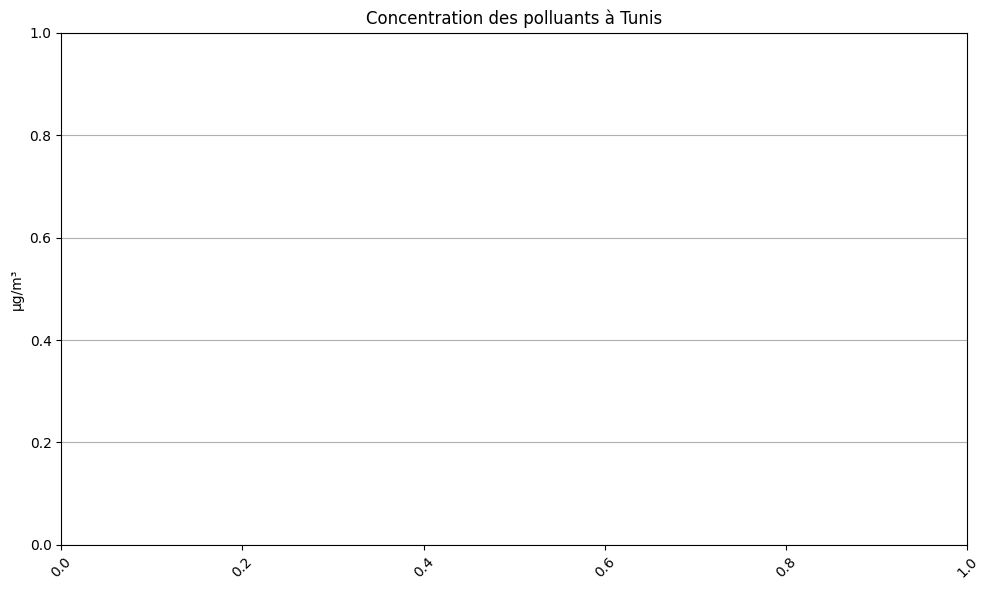

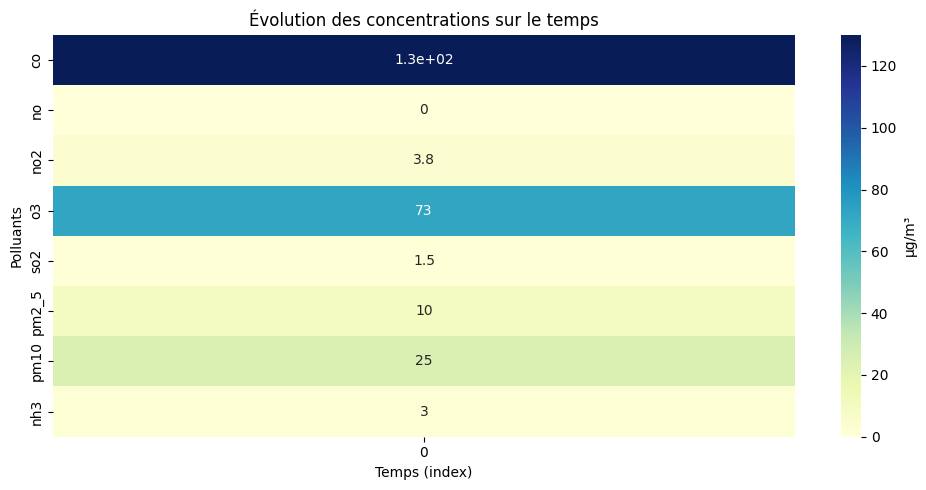


Indice AQI à Tunis : 2 → Acceptable

🌍 Comparaison avec les seuils recommandés OMS :
 - PM2_5 : 10.3 µg/m³ (seuil OMS : 15) → ✅ Conforme
 - PM10 : 24.9 µg/m³ (seuil OMS : 45) → ✅ Conforme
 - NO2 : 3.8 µg/m³ (seuil OMS : 40) → ✅ Conforme
 - O3 : 72.6 µg/m³ (seuil OMS : 100) → ✅ Conforme
 - SO2 : 1.5 µg/m³ (seuil OMS : 20) → ✅ Conforme


In [10]:
# 1. Imports
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv

# Pour graphiques dynamiques si souhaité
import plotly.express as px

# Setup
load_dotenv()
sys.path.append(os.path.abspath("../src"))

from air_quality_connector import get_air_quality, format_air_quality_data

# 2. Paramètres
city = "Tunis"
coordinates = {"Tunis": (36.8065, 10.1815)}
lat, lon = coordinates[city]

# 3. Chargement des données
try:
    raw_data = get_air_quality(lat, lon)
    print(f"[✅] Données brutes récupérées pour {city}")
    data_df = format_air_quality_data(raw_data)
except Exception as e:
    print(f"[❌] Erreur : {e}")
    data_df = None

# 4. Visualisations si données valides
if data_df is not None and not data_df.empty:
    # Dernière mesure
    latest = data_df.iloc[-1]
    aqi = latest["aqi"]
    pollutants = latest[["co", "no", "no2", "o3", "so2", "pm2_5", "pm10", "nh3"]]

    # Mise en forme DataFrame pour graphes
    df_pollutants = pd.DataFrame(pollutants, columns=["Concentration (µg/m³)"])
    df_pollutants.reset_index(inplace=True)
    df_pollutants.columns = ["Polluant", "Concentration (µg/m³)"]

    # --- 📊 Barplot : concentrations par polluant
    plt.figure(figsize=(10, 6))
    sns.barplot(x="Polluant", y="Concentration (µg/m³)", data=df_pollutants, palette="coolwarm")
    plt.title(f"Concentration des polluants à {city}")
    plt.ylabel("µg/m³")
    plt.xticks(rotation=45)
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()


    # --- 🌡️ Heatmap
    heat_data = data_df[["co", "no", "no2", "o3", "so2", "pm2_5", "pm10", "nh3"]]
    plt.figure(figsize=(10, 5))
    sns.heatmap(heat_data.T, cmap="YlGnBu", annot=True, cbar_kws={'label': 'µg/m³'})
    plt.title("Évolution des concentrations sur le temps")
    plt.xlabel("Temps (index)")
    plt.ylabel("Polluants")
    plt.tight_layout()
    plt.show()

    # --- 🧠 AQI interpretation
    aqi_labels = {1: "Bonne", 2: "Acceptable", 3: "Modérée", 4: "Mauvaise", 5: "Très mauvaise"}
    print(f"\nIndice AQI à {city} : {aqi} → {aqi_labels.get(aqi, 'Inconnu')}")

    # --- 🔬 Alerte OMS (si souhaité)
    seuils_oms = {
        "pm2_5": 15,  # µg/m³
        "pm10": 45,
        "no2": 40,
        "o3": 100,
        "so2": 20,
    }
    print("\n🌍 Comparaison avec les seuils recommandés OMS :")
    for p, seuil in seuils_oms.items():
        val = latest.get(p)
        if pd.notnull(val):
            statut = "⚠️ Dépassement" if val > seuil else "✅ Conforme"
            print(f" - {p.upper()} : {val:.1f} µg/m³ (seuil OMS : {seuil}) → {statut}")

else:
    print("[❌] Données non disponibles ou vides.")
